## Data set

In [0]:
document = ["This is the most beautiful place in the world.", 
            "This man has more skills to show in cricket than any other game.", 
            "Hi there! how was your ladakh trip last month?", 
            "There was a player who had scored 200+ runs in single cricket innings in his career.", 
            "I have got the opportunity to travel to Paris next year for my internship.", 
            "May be he is better than you in batting but you are much better than him in bowling.", 
            "That was really a great day for me when I was there at Lavasa for the whole night.", 
            "That’s exactly I wanted to become, a highest ratting batsmen ever with top scores.", 
            "Does it really matter wether you go to Thailand or Goa, its just you have spend your holidays.", 
            "Why don’t you go to Switzerland next year for your 25th Wedding anniversary?", 
            "Travel is fatal to prejudice, bigotry, and narrow mindedness., and many of our people need it sorely on these accounts.", 
            "Stop worrying about the potholes in the road and enjoy the journey.", 
            "No cricket team in the world depends on one or two players. The team always plays to win.", 
            "Cricket is a team game. If you want fame for yourself, go play an individual game.", 
            "Because in the end, you won’t remember the time you spent working in the office or mowing your lawn. Climb that goddamn mountain.", 
            "Isn’t cricket supposed to be a team sport? I feel people should decide first whether cricket is a team game or an individual sport."]
y_label = [1,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0]
total_document = len(document)
print("totoal documents:", total_document )

totoal documents: 16


## Import libraries

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt

## Utils

In [0]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()
    #plt.figure(figsize=(17, 9))

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('Dataset PCA (n_components = 2)')

    #add label in x,y position with the label as the film title
    for i in range(len(X)):
        plt.text(X[i,0], X[i,1], round(X[i,0],2), size=8) 

    plt.show()

## Use tf-idf

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(document)

In [0]:
print(vectorizer.get_feature_names())
total_feature = len(vectorizer.get_feature_names())
print("total feature:", total_feature)
print(X.shape)
#print(X)
print(X[0:2])
#print(X[0,89])

['200', '25th', 'accounts', 'anniversary', 'batsmen', 'batting', 'beautiful', 'better', 'bigotry', 'bowling', 'career', 'climb', 'cricket', 'day', 'decide', 'depends', 'does', 'don', 'end', 'enjoy', 'exactly', 'fame', 'fatal', 'feel', 'game', 'goa', 'goddamn', 'got', 'great', 'hi', 'highest', 'holidays', 'individual', 'innings', 'internship', 'isn', 'journey', 'just', 'ladakh', 'lavasa', 'lawn', 'man', 'matter', 'mindedness', 'month', 'mountain', 'mowing', 'narrow', 'need', 'night', 'office', 'opportunity', 'paris', 'people', 'place', 'play', 'player', 'players', 'plays', 'potholes', 'prejudice', 'ratting', 'really', 'remember', 'road', 'runs', 'scored', 'scores', 'single', 'skills', 'sorely', 'spend', 'spent', 'sport', 'stop', 'supposed', 'switzerland', 'team', 'thailand', 'time', 'travel', 'trip', 'want', 'wanted', 'wedding', 'wether', 'win', 'won', 'working', 'world', 'worrying', 'year']
total feature: 92
(16, 92)
  (0, 89)	0.5243543822136046
  (0, 54)	0.6021015204487483
  (0, 6)	0.

## Transform X into X_list for PCA use

In [0]:
X_list = X.toarray()

In [0]:
print(X_list)
print(X_list[0])

[[0.         0.         0.         ... 0.52435438 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0.         0.         0.         0.         0.         0.
 0.60210152 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.60210152 0.         0.

## Clustering by KMeans

In [0]:
cluster = 2
model = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=20) #n_init=1
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
print(model.labels_)
print(np.array(y_label))

[0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1]
[1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


## PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_list)

X_pca = pca.transform(X_list)

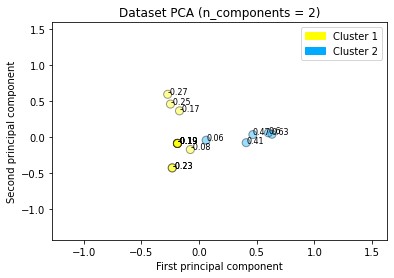

In [0]:
plot_labelled_scatter(X_pca, model.labels_, ['Cluster 1', 'Cluster 2'])

In [0]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [0]:
for i in range(cluster):
  print(f"Cluster {i}:")
  for ind in order_centroids[i, :10]:
    print(f"    {terms[ind]}")

Cluster 0:
    better
    year
    really
    travel
    place
    beautiful
    world
    trip
    hi
    ladakh
Cluster 1:
    cricket
    team
    game
    man
    skills
    individual
    sport
    fame
    want
    play


In [0]:
test = vectorizer.transform(["Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball."])
print(test.shape)
predicted = model.predict(test)
print(predicted)

(1, 92)
[1]


## cosine similarity

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(X[3], X))
print(cosine_similarity(X[3], X[3]))
print(cosine_similarity(X[3], X[1]))
print(cosine_similarity(X[3], X[-1]))

[[0.         0.08912642 0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.05623769 0.05774762 0.         0.08221283]]
[[1.]]
[[0.08912642]]
[[0.08221283]]


In [0]:
def cos_sim(x, y):
    return np.dot(x, y) / (np.linalg.norm(x, 2) * np.linalg.norm(y, 2)) 

In [0]:
X_list[3]

In [0]:
print(cos_sim(X_list[3], X_list[3]))
print(cos_sim(X_list[3], X_list[1]))
print(cos_sim(X_list[3], X_list[-1]))

1.0000000000000002
0.0891264218899242
0.08221282660947742
